In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Importing Dataset

In [2]:
df = sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
print(f"Number of passengers = {len(df)}")

Number of passengers = 891


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


## Analyzing Dataset

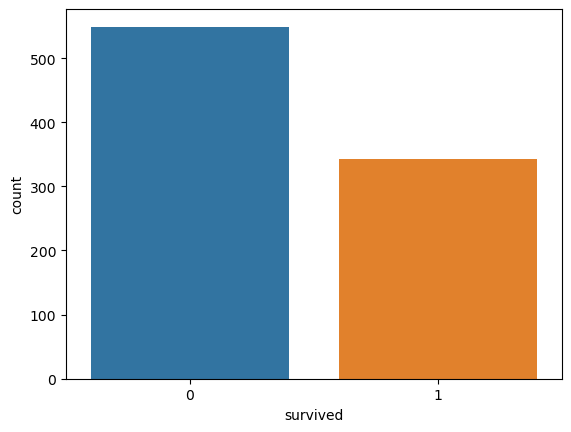

In [5]:
sns.countplot(data=df, x="survived");

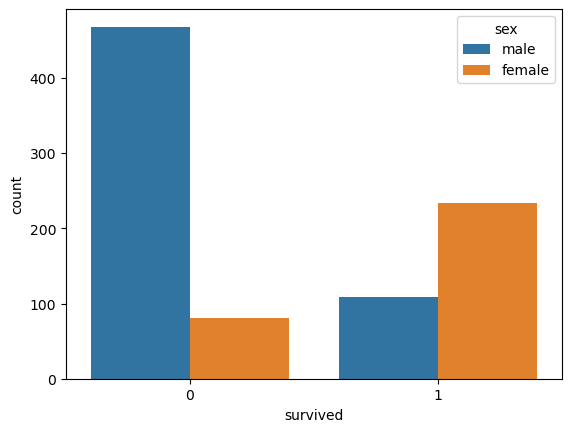

In [6]:
sns.countplot(data=df, x="survived", hue="sex");

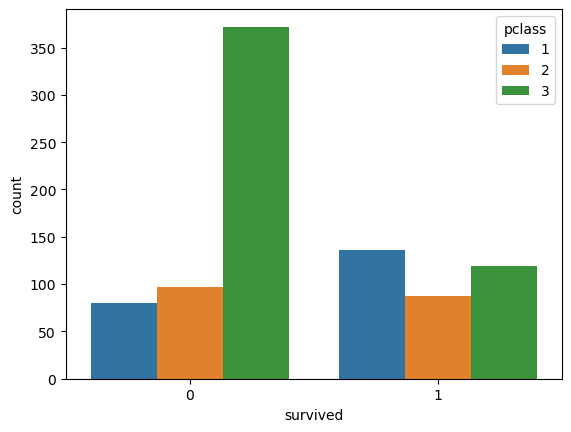

In [7]:
sns.countplot(data=df, x="survived", hue="pclass");

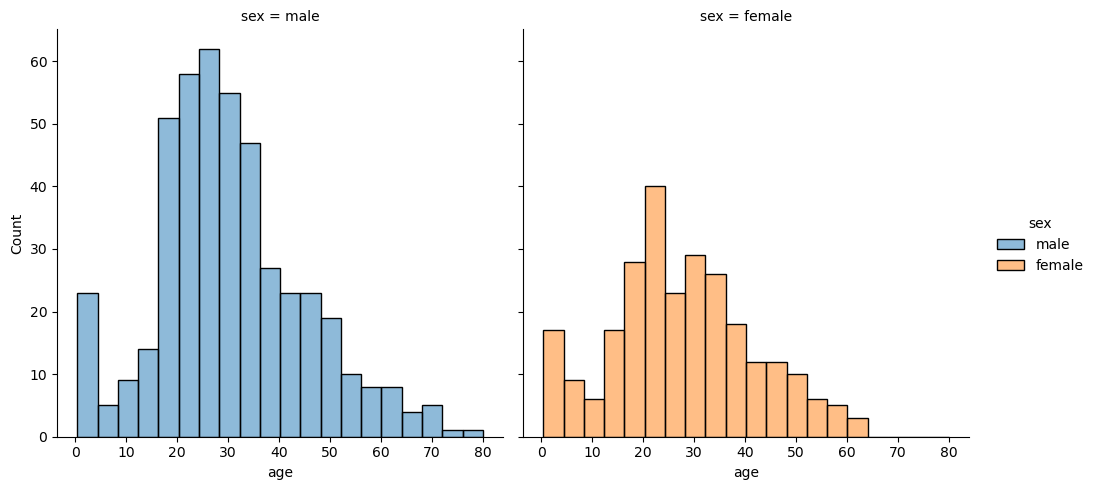

In [8]:
sns.displot(data=df, col="sex", x="age", hue="sex", kind="hist");

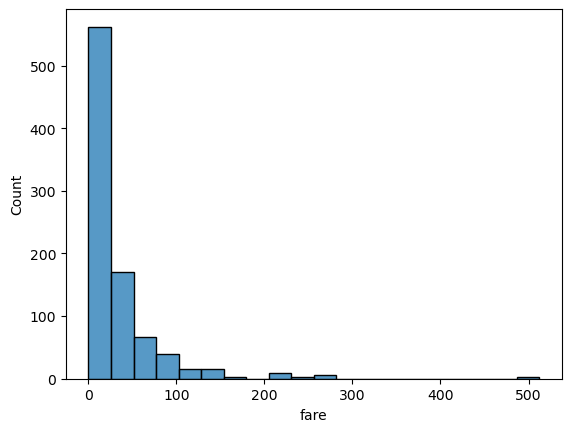

In [9]:
sns.histplot(data=df, x="fare", bins=20);

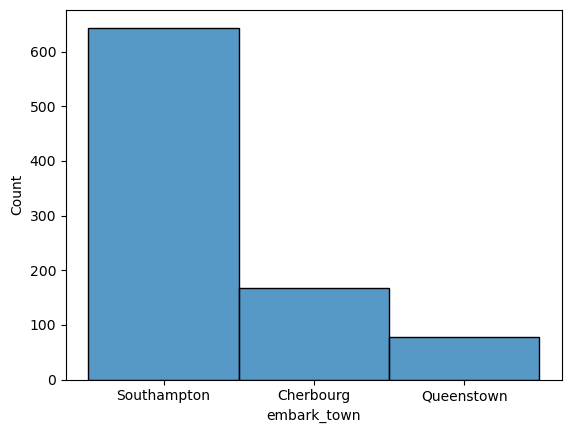

In [10]:
sns.histplot(data=df, x="embark_town");

## Data Cleaning

### 1. Handle missing values

1.1 Check the null values in the dataset

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


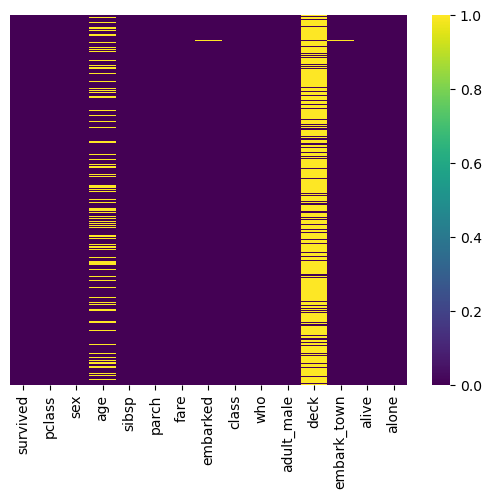

In [11]:
print(df.isnull().sum())
sns.heatmap(data=df.isnull(), cmap="viridis", yticklabels=False);

1.2 Drop the "deck" column because it has very null values.

In [12]:
df = df.drop(columns=["deck"])

1.3 Check the distribution of "age" vs "pclass"

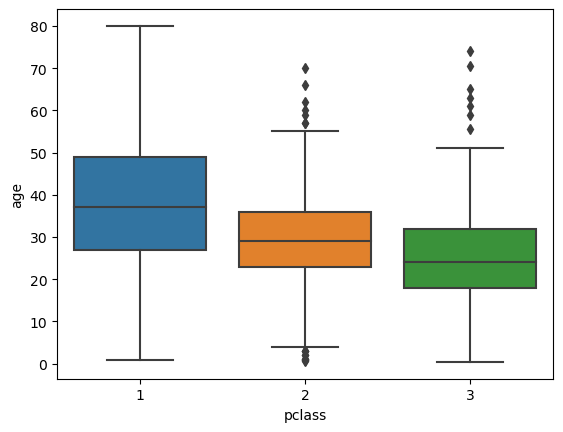

In [13]:
sns.boxplot(data=df, x="pclass", y="age");

1.4 It seems that it's a good way to fill null values in age column with mean of "age" based of "pclass".

In [14]:
mean_of_ages = df.groupby("pclass")["age"].transform("mean").astype("int")
df["age"] = df.groupby("pclass")["age"].fillna(mean_of_ages)

1.5 For other null values just drop the entire row in enough.

In [15]:
df = df.dropna()
df.isna().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

### 2. Drop the duplicated columns

In [16]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


2.1 Compare "survived" and "alive" columns

In [17]:
# The "survived" and "alive" columns are the same. we can drop the "alive" column which have the string values.
ans = (df["alive"].map({"no": 0, "yes": 1}) == df["survived"]).all()
print(f"Are 'survived' and 'alive' columns the same? {ans}")

df = df.drop("alive", axis=1)
df.head(3)

Are 'survived' and 'alive' columns the same? True


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,True


2.2 Compare "embarked" and "embark_town" columns

In [18]:
# The 'embarked' and 'embark_town' columns are the same. we can drop the one of them.
ans = (df["embark_town"].map({"Southampton": "S", "Cherbourg": "C", "Queenstown": "Q"}) == df["embarked"]).all()
print(f"Are 'embark_town' and 'embarked' columns the same? {ans}")

df = df.drop("embark_town", axis=1)
df.head(3)

Are 'embark_town' and 'embarked' columns the same? True


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,True


2.3 Compare "pclass" and "class" columns

In [19]:
# The 'pclass' and 'class' columns are the same. we can drop the one of them.
ans = (df["class"].map({"First": 1, "Second": 2, "Third": 3}) == df["pclass"]).all()
print(f"Are 'pclass' and 'class' columns the same? {ans}")

df = df.drop("pclass", axis=1)
df.head(3)

Are 'pclass' and 'class' columns the same? True


,survived,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,alone
0,0,male,22.0,1,0,7.2500,S,Third,man,True,False
1,1,female,38.0,1,0,71.2833,C,First,woman,False,False
2,1,female,26.0,0,0,7.9250,S,Third,woman,False,True


### 3. Convert boolean columns ('adult_male' and 'alone') to 0 and 1

In [20]:
df["adult_male"] = df["adult_male"].astype("int")
df["alone"] = df["alone"].astype("int")
df.head(3)

,survived,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,alone
0,0,male,22.0,1,0,7.2500,S,Third,man,1,0
1,1,female,38.0,1,0,71.2833,C,First,woman,0,0
2,1,female,26.0,0,0,7.9250,S,Third,woman,0,1


### 4. Convert "sex" column to 0 and 1

In [21]:
df["sex"] = df["sex"].map({"male": 1, "female":0})
df.head(3)

,survived,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,alone
0,0,1,22.0,1,0,7.2500,S,Third,man,1,0
1,1,0,38.0,1,0,71.2833,C,First,woman,0,0
2,1,0,26.0,0,0,7.9250,S,Third,woman,0,1


### 5. Check categorical columns and convert them to dummy variables

In [22]:
for column in ["class", "embarked", "who"]:
    print(f"\nNumber of unique values in {column!r} column:")
    print(df[column].value_counts())
    print("-" * 30)


Number of unique values in 'class' column:
class
Third     491
First     214
Second    184
Name: count, dtype: int64
------------------------------

Number of unique values in 'embarked' column:
embarked
S    644
C    168
Q     77
Name: count, dtype: int64
------------------------------

Number of unique values in 'who' column:
who
man      537
woman    269
child     83
Name: count, dtype: int64
------------------------------


In [23]:
who = pd.get_dummies(df["who"], dtype="int", drop_first=True)
embarked = pd.get_dummies(df["embarked"], dtype="int", drop_first=True)
classes = pd.get_dummies(df["class"], dtype="int", drop_first=True)

In [24]:
df = pd.concat((df, who, embarked, classes), axis="columns")
df = df.drop(columns=["class", "embarked", "who"])
df.head()

,survived,sex,age,sibsp,parch,fare,adult_male,alone,man,woman,Q,S,Second,Third
0,0,1,22.0,1,0,7.2500,1,0,1,0,0,1,0,1
1,1,0,38.0,1,0,71.2833,0,0,0,1,0,0,0,0
2,1,0,26.0,0,0,7.9250,0,1,0,1,0,1,0,1
3,1,0,35.0,1,0,53.1000,0,0,0,1,0,1,0,0
4,0,1,35.0,0,0,8.0500,1,1,1,0,0,1,0,1


### 6. Check dtypes and missing values again.

In [25]:
df.dtypes

survived        int64
sex             int64
age           float64
sibsp           int64
parch           int64
fare          float64
adult_male      int64
alone           int64
man             int64
woman           int64
Q               int64
S               int64
Second          int64
Third           int64
dtype: object

In [26]:
df.isnull().sum()

survived      0
sex           0
age           0
sibsp         0
parch         0
fare          0
adult_male    0
alone         0
man           0
woman         0
Q             0
S             0
Second        0
Third         0
dtype: int64

In [27]:
df.head(3)

,survived,sex,age,sibsp,parch,fare,adult_male,alone,man,woman,Q,S,Second,Third
0,0,1,22.0,1,0,7.2500,1,0,1,0,0,1,0,1
1,1,0,38.0,1,0,71.2833,0,0,0,1,0,0,0,0
2,1,0,26.0,0,0,7.9250,0,1,0,1,0,1,0,1


## Create the classification model

### 1. Import libraries

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

### 2. Matrix of featurs and Matrix of labels

In [29]:
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values
print(X.shape)
print(y.shape)

(889, 13)
(889,)


### 3. Splitting dataset and Fit the model

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
lg_clf = LogisticRegression(max_iter=500)
lg_clf.fit(X_train, y_train)

LogisticRegression(max_iter=500)

### 4. Evaluating the model


Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.88      0.86       105
           1       0.81      0.78      0.80        73

    accuracy                           0.84       178
   macro avg       0.83      0.83      0.83       178
weighted avg       0.84      0.84      0.84       178



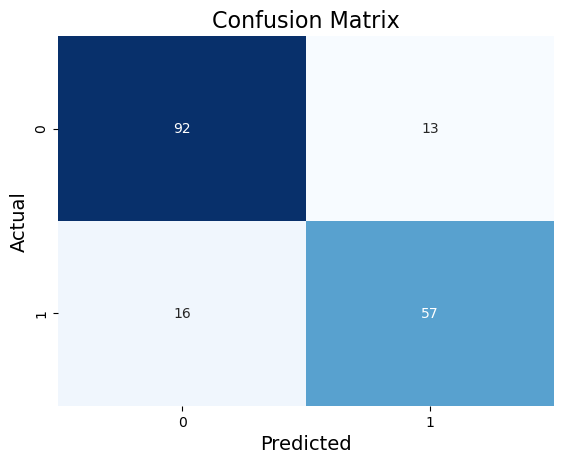

In [31]:
y_pred = lg_clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(f"\nClassification Report:\n{report}")
ax = sns.heatmap(cm, annot=True, cmap="Blues", cbar=False, fmt="d")
ax.set_xlabel("Predicted", fontsize=14)
ax.set_ylabel("Actual", fontsize=14)
ax.set_title("Confusion Matrix", fontsize=16);

## 